# OELTask
# Muhammad Omer Bin Atique - 2020335
# Instructor: Sir Muneeb
# Cats and Dogs Classification

### Import required Libraries

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2 
import glob
import random
import tensorflow as tf
import tensorflow_hub as hub
import shutil

2023-05-08 15:51:45.791974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 15:51:46.046640: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-08 15:51:46.054242: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omer_atique/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-08 1

### Import OS library and count files in training set

In [2]:
import os

path, dirs, files = next(os.walk('./train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  8006


### Get the images name from the training set

In [3]:
file_names = os.listdir('./train/')

name = file_names
print(name[0:5])

['cat.1335.jpg', 'cat.936.jpg', 'cat.56.jpg', 'dog.2779.jpg', 'cat.377.jpg']


### Count the number of dog and cat images in training set

In [4]:
file_names = os.listdir('./train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

    name = img_file[0:3]

    if name == 'dog':
        dog_count += 1

    else:
        cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 4005
Number of cat images = 4001


### Make a new folder for resized images and convert all images to (224, 224) 

In [5]:
shutil.rmtree('./resizedImages', ignore_errors=True)
os.mkdir('./resizedImages')

In [6]:
original_folder = './train/'
resized_folder = './resizedImages/'

for i in range(697):

    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImgPath = resized_folder+filename
    img.save(newImgPath)

In [7]:
file_names = os.listdir('./resizedImages/')

dog_count = 0
cat_count = 0

for img_file in file_names:

    name = img_file[0:3]

    if name == 'dog':
        dog_count += 1

    else:
        cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 351
Number of cat images = 346


### Make a label set to binary label the corresponding images

In [8]:
filenames = os.listdir('./resizedImages/')


labels = []

for i in range(697):

    file_name = filenames[i]
    label = file_name[0:3]

    if label == 'dog':
        labels.append(1)

    else:
        labels.append(0)

In [9]:
image_directory = './resizedImages/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

### Get The possible values and the count of each in label set

In [10]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[346 351]


### Finalize Training set and its labels

In [11]:
X = dog_cat_images
Y = np.asarray(labels)

### Split training set and lebels into training and test sets respectively 

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(697, 224, 224, 3) (557, 224, 224, 3) (140, 224, 224, 3)


### Normalize the x sets

In [14]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

### Import pretrained MobileNet model 

In [15]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

2023-05-08 15:52:27.519978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-08 15:52:27.520695: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omer_atique/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-08 15:52:27.520901: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omer_atique/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-08 15:52:27.521033: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Co

### Build your neural network with MobileNet for the classification of 2 classes

In [16]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


### Compile model

In [17]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

### Fit the model (Training)

In [18]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
18/18 [==============================] - 15s 559ms/step - loss: 0.4377 - acc: 0.7989
Epoch 2/5
18/18 [==============================] - 10s 549ms/step - loss: 0.1134 - acc: 0.9605
Epoch 3/5
18/18 [==============================] - 10s 543ms/step - loss: 0.0741 - acc: 0.9785
Epoch 4/5
18/18 [==============================] - 10s 546ms/step - loss: 0.0573 - acc: 0.9874
Epoch 5/5
18/18 [==============================] - 10s 561ms/step - loss: 0.0463 - acc: 0.9910


### Evaluate the test set 

In [21]:
score, acc = model.evaluate(X_test_scaled, Y_test)
#print('Test Loss =', score)
print('Test Accuracy =', acc*100)

5/5 [==============================] - 5s 531ms/step - loss: 0.0855 - acc: 0.9786
Test Accuracy = 97.85714149475098


### Build function to help predict whether a given image is a cat or a dogj

In [22]:
def classifyImage(path):
    
    input_image = cv2.imread(path)
    plt.imshow(input_image)
    plt.show()

    input_image_resize = cv2.resize(input_image, (224,224))

    input_image_scaled = input_image_resize/255

    image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

    input_prediction = model.predict(image_reshaped)

    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)

    print(f"Label Predicted: {input_pred_label}")

    if input_pred_label == 0:
        print('The image represents a Cat')

    else:
        print('The image represents a Dog')
    

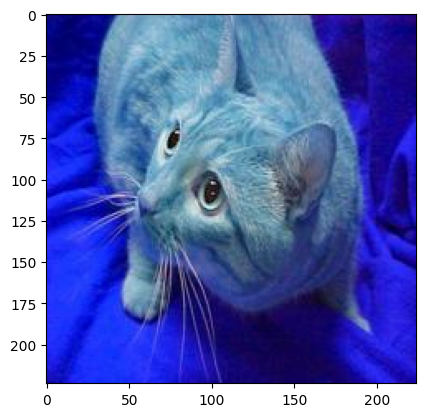

1/1 [==============================] - 1s 1000ms/step
[[ 2.5893505 -1.5659397]]
Label Predicted: 0
The image represents a Cat


In [23]:
classifyImage("./predcat.jpg")

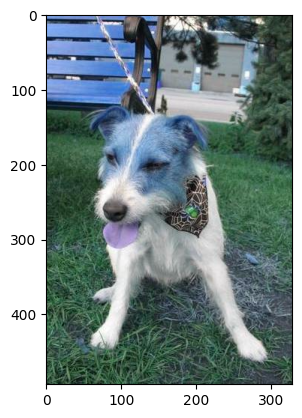

1/1 [==============================] - 0s 81ms/step
[[-1.9958385  2.8850026]]
Label Predicted: 1
The image represents a Dog


In [24]:
classifyImage("./predDog.jpg")

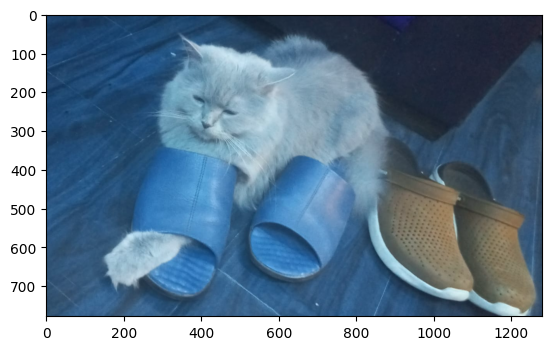

1/1 [==============================] - 0s 76ms/step
[[ 3.3695498 -2.5466673]]
Label Predicted: 0
The image represents a Cat


In [25]:
classifyImage("./pred1.jpg")